## Part A

In [530]:
# Import packages
import numpy as np
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math

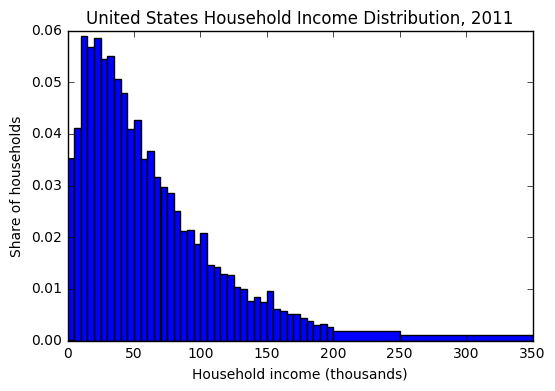

In [531]:
data = np.loadtxt('data/usincmoms.txt')
weights = data[:,0]
midpoints = data[:,1]
midpoints_adj = midpoints/1000
weights[-1], weights[-2] = (weights[-1]/20), (weights[-2]/10)
bins = np.linspace(0,200,41)
bins_adj = np.append(bins,[250,350])
count, bins, ignored = plt.hist(midpoints_adj, bins=bins_adj, weights=weights)
plt.title("United States Household Income Distribution, 2011")
plt.xlabel("Household income (thousands)")
plt.ylabel("Share of households")
plt.show()

## Part B

In [532]:
# Define new lists of the upper and lower limits of each bin
left = midpoints_adj - 2.5
left[-1] = 250
left[-2] = 200
right = midpoints_adj + 2.5
right[-1] = 350
right[-2] = 250

In [533]:
# Define data moments as the percentiles given in the distribution
data_moments = data[:,0]

In [534]:
# Function to calculate the model moments
def moments_LN(mu, sigma):
    cdf_left = np.zeros_like(left)
    cdf_right = np.zeros_like(left)
    for i in range(len(left)-1):
        cdf_left[i] = sts.lognorm.cdf(left[i], sigma, scale = math.exp(mu))
        cdf_right[i] = sts.lognorm.cdf(right[i], sigma, scale = math.exp(mu))
    moments = cdf_right - cdf_left
    return moments

In [535]:
def err_vec(x, *params):
    mu, sigma = params
    mod_moments = moments_LN(mu, sigma)
    return (mod_moments - data_moments)

In [536]:
def criterion(params, *args):
    mu, sigma = params
    x, W = args
    err = err_vec(x, mu, sigma)
    err = np.reshape(err,(42,1))
    crit_val = np.dot(np.dot(err.T, W),err)
    return crit_val

In [537]:
#Set up initial values
#Determine mean initial value by estimating log mean of data
mean = 0
for i in range(len(bins_adj)-1):
    mean += (bins_adj[i])*(weights[i])
mean = mean
ln_mean = math.log(mean)

ln_mean = 10

#Arbitrarily pick an initial sigma
sigma_init = 5

params_init = np.array([ln_mean, sigma_init])

#Set the weighting matrix
W = np.diag(data[:,0])

In [538]:
results = opt.minimize(criterion, params_init, args=((midpoints_adj, W)),
                       method='L-BFGS-B', bounds=((None, None), (0, None)))
mu_GMM = results.x[0]
sigma_GMM = results.x[1]

print("LN - GMM Output")
print(results)
print("mu_GMM = "+str(mu_GMM))
print("sigma_GMM = "+str(sigma_GMM))

LN - GMM Output
      fun: array([[  3.15320483e-05]])
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.85395251e-06,   1.14102927e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 273
      nit: 14
   status: 0
  success: True
        x: array([ 3.9758613 ,  1.04564568])
mu_GMM = 3.97586129567
sigma_GMM = 1.0456456754


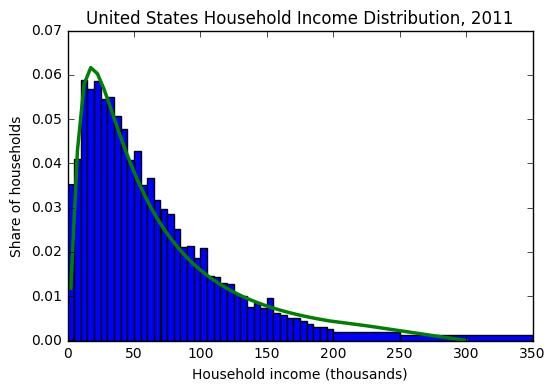

In [539]:
data = np.loadtxt('data/usincmoms.txt')
weights = data[:,0]
midpoints = data[:,1]
midpoints_adj = midpoints/1000
weights[-1], weights[-2] = (weights[-1]/20), (weights[-2]/10)
bins = np.linspace(0,200,41)
bins_adj = np.append(bins,[250,350])
count, bins, ignored = plt.hist(midpoints_adj, bins=bins_adj, weights=weights)
x_vals = midpoints_adj
left = midpoints_adj - 2.5
left[0] = 1e-10
left[-1] = 250
left[-2] = 200
right = midpoints_adj + 2.5
right[-1] = 350
right[-2] = 250
y_vals = np.zeros_like(x_vals)
for i in range(len(y_vals)-1):
    y_vals[i] = sts.lognorm.cdf(right[i], sigma_GMM, scale=math.exp(mu_GMM))-sts.lognorm.cdf(left[i], sigma_GMM, scale=math.exp(mu_GMM))
y_vals[-1] = y_vals[-1]/20
y_vals[-2] = y_vals[-2]/10
plt.plot(x_vals, y_vals, linewidth=2.5)
plt.title("United States Household Income Distribution, 2011")
plt.xlabel("Household income (thousands)")
plt.ylabel("Share of households")
plt.show()

## Part C

In [540]:
# Define new lists of the upper and lower limits of each bin
left = midpoints_adj - 2.5
left[-1] = 250
left[-2] = 200
right = midpoints_adj + 2.5
right[-1] = 350
right[-2] = 250

data_moments = data[:,0]

In [541]:
def gamma_pdf(x, alpha, beta):
    gamma = math.gamma(alpha)
    d = gamma*(beta**alpha)
    B = x**(alpha-1)
    C = np.exp(np.multiply(-1,x)/beta)
    pdf_vals = B*C/d
    return pdf_vals

In [542]:
def moments_gamma(alpha, beta):
    cdf_left = np.zeros_like(left)
    cdf_right = np.zeros_like(left)
    for i in range(len(left)-1):
        cdf_left[i] = sts.gamma.cdf(left[i], alpha, scale = beta)
        cdf_right[i] = sts.gamma.cdf(right[i], alpha, scale = beta)
    moments = cdf_right - cdf_left
    return moments

In [543]:
def err_vec(x, *params):
    alpha, beta = params
    mod_moments = moments_gamma(alpha, beta)
    return (mod_moments - data_moments)

In [544]:
def criterion(params, *args):
    alpha, beta = params
    x, W = args
    err = err_vec(x, alpha, beta)
    err = np.reshape(err,(42,1))
    crit_val = np.dot(np.dot(err.T, W),err)
    return crit_val

In [545]:
alpha_init = 3
beta_init = 20

params_init = np.array([alpha_init, beta_init])

#Set the weighting matrix
W = np.diag(data[:,0])

In [546]:
results = opt.minimize(criterion, params_init, args=((midpoints_adj, W)),
                       method='L-BFGS-B', bounds=((None, None), (0, None)))
alpha_GMM = results.x[0]
beta_GMM = results.x[1]

print("Gamma - GMM Output")
print(results)
print("alpha_GMM = "+str(alpha_GMM))
print("beta_GMM = "+str(beta_GMM))

Gamma - GMM Output
      fun: array([[  6.57673564e-06]])
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  6.76371224e-07,  -5.09804567e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 54
      nit: 16
   status: 0
  success: True
        x: array([  1.434944  ,  44.22629922])
alpha_GMM = 1.43494400423
beta_GMM = 44.2262992168


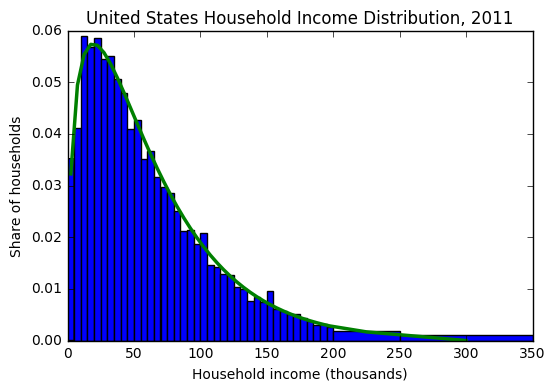

In [547]:
data = np.loadtxt('data/usincmoms.txt')
weights = data[:,0]
midpoints = data[:,1]
midpoints_adj = midpoints/1000
weights[-1], weights[-2] = (weights[-1]/20), (weights[-2]/10)
bins = np.linspace(0,200,41)
bins_adj = np.append(bins,[250,350])
count, bins, ignored = plt.hist(midpoints_adj, bins=bins_adj, weights=weights)
x_vals = midpoints_adj
left = midpoints_adj - 2.5
left[0] = 1e-10
left[-1] = 250
left[-2] = 200
right = midpoints_adj + 2.5
right[-1] = 350
right[-2] = 250
y_vals = np.zeros_like(x_vals)
for i in range(len(y_vals)-1):
    y_vals[i] = sts.gamma.cdf(right[i], alpha_GMM, scale=beta_GMM)-sts.gamma.cdf(left[i], alpha_GMM, scale=beta_GMM)
y_vals[-1] = y_vals[-1]/20
y_vals[-2] = y_vals[-2]/10
plt.plot(x_vals, y_vals, linewidth=2.5)
plt.title("United States Household Income Distribution, 2011")
plt.xlabel("Household income (thousands)")
plt.ylabel("Share of households")
plt.show()

## Part D

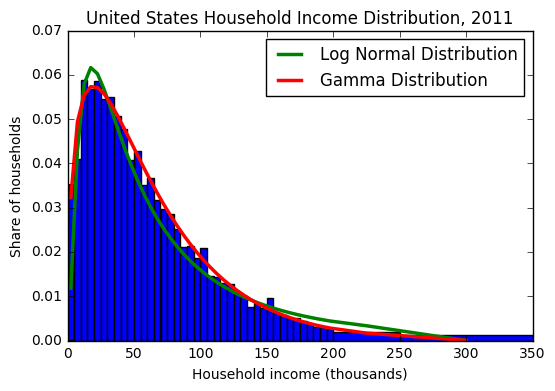

In [548]:
data = np.loadtxt('data/usincmoms.txt')
weights = data[:,0]
midpoints = data[:,1]
midpoints_adj = midpoints/1000
weights[-1], weights[-2] = (weights[-1]/20), (weights[-2]/10)
bins = np.linspace(0,200,41)
bins_adj = np.append(bins,[250,350])
count, bins, ignored = plt.hist(midpoints_adj, bins=bins_adj, weights=weights)
x_vals = midpoints_adj
left = midpoints_adj - 2.5
left[0] = 1e-10
left[-1] = 250
left[-2] = 200
right = midpoints_adj + 2.5
right[-1] = 350
right[-2] = 250
y_vals = np.zeros_like(x_vals)
for i in range(len(y_vals)-1):
    y_vals[i] = sts.lognorm.cdf(right[i], sigma_GMM, scale=math.exp(mu_GMM))-sts.lognorm.cdf(left[i], sigma_GMM, scale=math.exp(mu_GMM))
y_vals[-1] = y_vals[-1]/20
y_vals[-2] = y_vals[-2]/10
plt.plot(x_vals, y_vals, linewidth=2.5, label='Log Normal Distribution')
x_vals = midpoints_adj
left = midpoints_adj - 2.5
left[0] = 1e-10
left[-1] = 250
left[-2] = 200
right = midpoints_adj + 2.5
right[-1] = 350
right[-2] = 250
y_vals = np.zeros_like(x_vals)
for i in range(len(y_vals)-1):
    y_vals[i] = sts.gamma.cdf(right[i], alpha_GMM, scale=beta_GMM)-sts.gamma.cdf(left[i], alpha_GMM, scale=beta_GMM)
y_vals[-1] = y_vals[-1]/20
y_vals[-2] = y_vals[-2]/10
plt.plot(x_vals, y_vals, linewidth=2.5, label='Gamma Distribution')
plt.title("United States Household Income Distribution, 2011")
plt.xlabel("Household income (thousands)")
plt.ylabel("Share of households")
plt.legend()
plt.show()

It appears that the gamma distribution is a better fit for the data set. We can verify that this is the case by noting that it has a smaller error in the output of its optimization function.

## Part E

In [549]:
def err_vec(x, *params):
    alpha, beta = params
    mod_moments = moments_gamma(alpha, beta)
    return (mod_moments - data_moments)

err1 = err_vec(midpoints_adj, alpha_GMM, beta_GMM)
err1 = np.reshape(err1,(42,1))
VCV2 = np.dot(err1, err1.T) / midpoints.shape[0]

W_hat2 = lin.pinv(VCV2)

In [552]:
alpha_init = 3
beta_init = 20

params_init = np.array([alpha_init, beta_init])

results = opt.minimize(criterion, params_init, args=((midpoints_adj, W_hat2)),
                       method='L-BFGS-B', bounds=((None, None), (0, None)))
alpha_GMM = results.x[0]
beta_GMM = results.x[1]

print("Gamma - GMM Output")
print(results)
print("alpha_GMM = "+str(alpha_GMM))
print("beta_GMM = "+str(beta_GMM))

Gamma - GMM Output
      fun: array([[ -3.05434786e-15]])
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  2.71494498e-06,   7.78549623e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 36
      nit: 11
   status: 0
  success: True
        x: array([  2.45308441,  10.7068542 ])
alpha_GMM = 2.45308440541
beta_GMM = 10.7068541997


The total error is smaller once we apply the two step weighting matrix, so it seems to be a better fit for the data.